# Data Visualiztion Course Final Projet
> by Kfir Goldfarb

<a href="https://github.com/kggold4"><img src="images/github.png" width="25px" height="25px" align="left"></a>
<a href="https://www.linkedin.com/in/kfir-goldfarb/"><img src="images/in.png"  width="25px" height="25px" align="left"></a>
<a href="mailto:kfir.goldfarb@msmail.ariel.ac.il"><img src="images/email.png" width="25px" height="25px" align="left"></a>
<a href="https://www.youtube.com/channel/UCypEWlruyG_I5A48GqB5c6g"><img src="images/youtube.png" width="25px" height="25px" align="left"></a>
<a href="https://www.hackerrank.com/kggold4?hr_r=1"><img src="images/hackerrank.png" width="25px" height="25px" align="left"></a>
<a href="https://stackoverflow.com/users/14749277/kfir-goldfarb"><img src="images/stackoverflow.png" width="25px" height="25px" align="left"></a>


<br>

# Jupyter Notebook Number 3
<i>Dimensionality Reduction, PCA and Classification using ensemble and usupervised learning for Cat & Dog dataset</i>

## In this notebook I tested Cat & Dog dataset classification models on three different dimensionality and images size:

1. 335-PCA Components with 100^100 pixels images (grey scale)
2. 300-PCA Components with 30^30 pixels images (no grey scale)
3. 185-PCA Components with 30^30 pixels images (no grey scale)

In [1]:
# Data Science libraries
import pandas as pd
import numpy as np

# Graphical libraries
import matplotlib.pyplot as plt
%matplotlib inline
import plotly.graph_objs as go
import plotly.offline as py
import seaborn as sns
import cv2

# Main libraries
import os
import random
import warnings
from zipfile import ZipFile as zf
warnings.filterwarnings('ignore')
warnings.simplefilter('ignore')

# sklearn tools
from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV

# basic models
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression

# sklearn
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.preprocessing import normalize
from sklearn.preprocessing import StandardScaler

# ensemble
from sklearn.ensemble import VotingClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
import xgboost as xgb

### <i>Helping Functions I Wrote:</i>

In [2]:
# function that print the accuracy of a classification model
def print_accuracy(clf, X_train, X_test, y_train, y_test):
    # fit the train data to the model
    clf.fit(X_train, y_train)

    # get the pridictions of X_test
    pridictions = clf.predict(X_test)
    probabilities = clf.predict_proba(X_test)
    probabilities = probabilities[:, 1]

    # get the accuracy of the model
    accuracy = clf.score(X_test, y_test)

    # print the accuracy
    print(classification_report(y_test, pridictions))
    print('accuracy of the model is: {} %'.format("%.2f" % (accuracy * 100)))
    return accuracy

In [3]:
# function of ploting the confusion_matrix
def my_plot_confusion_matrix(clf, X_test, y_test):

    # get the confusion_matrix for ploting
    matrix = plot_confusion_matrix(clf, X_test, y_test, cmap=plt.cm.Blues)

    # main title
    matrix.ax_.set_title('Confusion matrix')

    # x label
    plt.xlabel('Predicted Label')

    # y label
    plt.ylabel('True label')

    # size of the figure
    plt.gcf().set_size_inches(10, 6)

    # show plot
    plt.show()

In [4]:
# saving the result of all components in:
components_accuracy = []

In [5]:
# images size
IMAGE_SIZE = 100

# path of the images of the cats vs dogs data
PATH = "data/task_3/train"

# Creating a dataframe that contains all of our images names with his label (0 - 'cat', 1 - 'dog')
images = os.listdir(PATH)
label = []

for image in images:
    if 'cat' in image:
        label.append(0)
    else:
        label.append(1)
        
dogs_cats = {'image' : images, 'label' : label}
dogs_cats = pd.DataFrame(dogs_cats)

# mixing data
dogs_cats = dogs_cats.sample(frac = 1).reset_index(drop=True)

In [6]:
# show first and last five samples of our data
dogs_cats

,image,label
0,dog.5377.jpg,1
1,cat.7772.jpg,0
2,dog.12206.jpg,1
3,cat.3483.jpg,0
4,cat.12131.jpg,0
...,...,...
24995,dog.416.jpg,1
24996,dog.5020.jpg,1
24997,cat.364.jpg,0
24998,cat.5128.jpg,0


# 100^2 Pixels with grey scale and PCA of 335 Components:

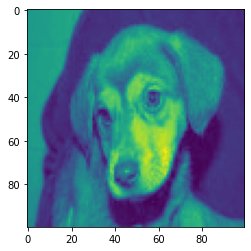

In [7]:
# printing a random image from the data
random_image_name = random.choice(dogs_cats.image)
random_image = cv2.imread(PATH + '/' + str(random_image_name))
random_image = cv2.resize(random_image, (IMAGE_SIZE, IMAGE_SIZE))
random_image = cv2.cvtColor(random_image, cv2.COLOR_RGB2GRAY)
plt.imshow(random_image)

In [8]:
image_data  = []
image_label = []

for i in range(len(dogs_cats)):
    IMAGE_PATH = PATH + '/' + dogs_cats["image"][i]
    image = cv2.imread(IMAGE_PATH, cv2.IMREAD_GRAYSCALE)
    image = cv2.resize(image, (IMAGE_SIZE, IMAGE_SIZE))
    
    norm_image = image / 255.0
    
    image_data.append(norm_image)
    image_label.append(dogs_cats["label"][i])

X = np.array(image_data)
y = np.array(image_label)

# reshape X from 3D shape to 2D shape
X = X.reshape(-1, IMAGE_SIZE * IMAGE_SIZE)

In [9]:
X.shape

(25000, 10000)

In [10]:
y.shape

(25000,)

In [11]:
# split data to 20000 train samples and 5000 to test samples
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20)

In [12]:
# train shape is 20000 on 100^2 pixels
X_train.shape

(20000, 10000)

In [13]:
pca_components = PCA(n_components=0.9)
X_transformed_train = pca_components.fit(X_train).transform(X_train)
X_transformed_test = pca_components.transform(X_test)
print("shape of 2 component PCA train data is:", X_transformed_train.shape)
print("shape of 2 component PCA test data is:", X_transformed_test.shape)

shape of 2 component PCA train data is: (20000, 334)
shape of 2 component PCA test data is: (5000, 334)


In [14]:
pca_components.explained_variance_ratio_

array([2.00929948e-01, 1.12241920e-01, 7.59635543e-02, 6.12917085e-02,
       3.16072070e-02, 2.81553888e-02, 2.37025075e-02, 2.03368005e-02,
       1.83113385e-02, 1.46598103e-02, 1.31684857e-02, 1.22610458e-02,
       1.05643487e-02, 8.88801392e-03, 8.26643430e-03, 7.97642711e-03,
       7.22093651e-03, 7.17402659e-03, 6.65713670e-03, 6.11542729e-03,
       5.26381135e-03, 5.16335638e-03, 4.89244721e-03, 4.65340074e-03,
       4.58044368e-03, 4.04242972e-03, 3.99463513e-03, 3.82829800e-03,
       3.63573505e-03, 3.45845598e-03, 3.43856106e-03, 3.34495799e-03,
       3.27608408e-03, 3.03757106e-03, 2.85906259e-03, 2.77076077e-03,
       2.74144629e-03, 2.60394761e-03, 2.47585252e-03, 2.40980245e-03,
       2.30112997e-03, 2.28689401e-03, 2.24786728e-03, 2.20389763e-03,
       2.10430194e-03, 2.08849453e-03, 2.00844870e-03, 1.99368321e-03,
       1.90036473e-03, 1.85277422e-03, 1.80697145e-03, 1.76464586e-03,
       1.73585045e-03, 1.66867506e-03, 1.65636058e-03, 1.63516192e-03,
      

### Bagging Classifier:

In [15]:
bagging_clf = BaggingClassifier(
    DecisionTreeClassifier(),
    n_estimators=200,
    max_samples=100,
    bootstrap=True,
    n_jobs=-1)

# print accuracy
bagging_clf_auc = print_accuracy(bagging_clf, X_transformed_train, X_transformed_test, y_train, y_test)

              precision    recall  f1-score   support

           0       0.56      0.60      0.58      2563
           1       0.54      0.50      0.52      2437

    accuracy                           0.55      5000
   macro avg       0.55      0.55      0.55      5000
weighted avg       0.55      0.55      0.55      5000

accuracy of the model is: 55.28 %


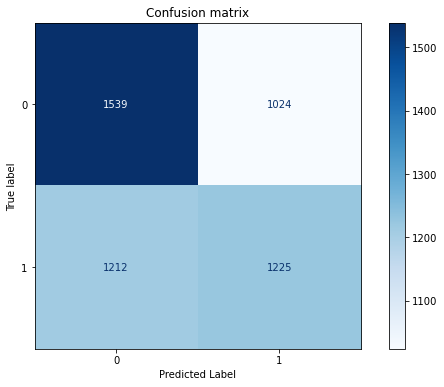

In [16]:
# plot the confusion matrix using the my_plot_confusion_matrix function
my_plot_confusion_matrix(bagging_clf, X_transformed_test, y_test)

### Pating Classifier:

In [17]:
pasting_clf = BaggingClassifier(
    DecisionTreeClassifier(),
    n_estimators=200,
    max_samples=100,
    bootstrap=False,
    n_jobs=-1)

# print accuracy
pasting_clf_auc = print_accuracy(pasting_clf, X_transformed_train, X_transformed_test, y_train, y_test)

              precision    recall  f1-score   support

           0       0.56      0.51      0.53      2563
           1       0.53      0.59      0.56      2437

    accuracy                           0.55      5000
   macro avg       0.55      0.55      0.54      5000
weighted avg       0.55      0.55      0.54      5000

accuracy of the model is: 54.52 %


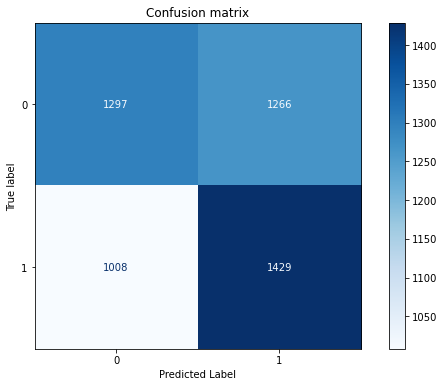

In [18]:
# plot the confusion matrix using the my_plot_confusion_matrix function
my_plot_confusion_matrix(pasting_clf, X_transformed_test, y_test)

### Random Forest Classifier:

In [19]:
rnd_clf = RandomForestClassifier(
    n_estimators=400,
    max_features=5,
    max_depth=16,
    n_jobs=-1)

# print accuracy
rnd_clf_auc = print_accuracy(rnd_clf, X_transformed_train, X_transformed_test, y_train, y_test)

              precision    recall  f1-score   support

           0       0.62      0.63      0.62      2563
           1       0.60      0.59      0.59      2437

    accuracy                           0.61      5000
   macro avg       0.61      0.61      0.61      5000
weighted avg       0.61      0.61      0.61      5000

accuracy of the model is: 60.80 %


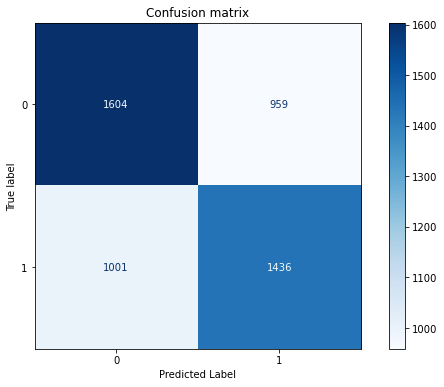

In [20]:
# plot the confusion matrix using the my_plot_confusion_matrix function
my_plot_confusion_matrix(rnd_clf, X_transformed_test, y_test)

### AdaBoost Classifier:

In [21]:
adaboost_clf = AdaBoostClassifier(
    DecisionTreeClassifier(max_depth=16),
    n_estimators=200,
    algorithm="SAMME.R",
    learning_rate=0.1)

# print accuracy
adaboost_clf_auc = print_accuracy(adaboost_clf, X_transformed_train, X_transformed_test, y_train, y_test)

              precision    recall  f1-score   support

           0       0.58      0.55      0.56      2563
           1       0.55      0.57      0.56      2437

    accuracy                           0.56      5000
   macro avg       0.56      0.56      0.56      5000
weighted avg       0.56      0.56      0.56      5000

accuracy of the model is: 56.20 %


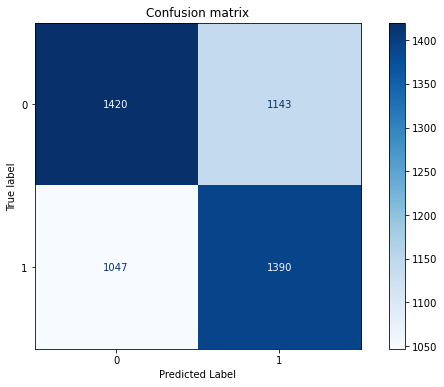

In [22]:
# plot the confusion matrix using the my_plot_confusion_matrix function
my_plot_confusion_matrix(adaboost_clf, X_transformed_test, y_test)

### Extreme Gradient Boostring Classifier(Binary):

In [23]:
bin_xgb_model = xgb.XGBClassifier(
    learning_rate=0.1,
    n_estimators=200,
    use_label_encoder=False,
    objective="binary:logistic",
    eval_metric="auc",
    verbosity=1,
    n_jobs=-1)

# print accuracy
bin_xgb_model_auc = print_accuracy(bin_xgb_model, X_transformed_train, X_transformed_test, y_train, y_test)

              precision    recall  f1-score   support

           0       0.66      0.63      0.64      2563
           1       0.63      0.66      0.64      2437

    accuracy                           0.64      5000
   macro avg       0.64      0.64      0.64      5000
weighted avg       0.64      0.64      0.64      5000

accuracy of the model is: 64.36 %


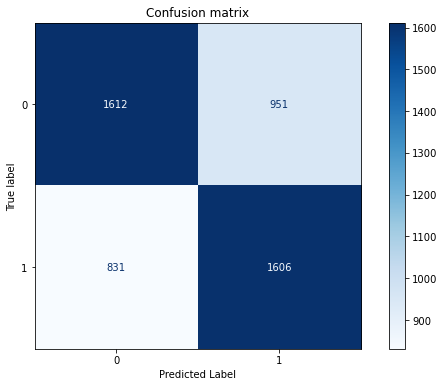

In [24]:
# plot the confusion matrix using the my_plot_confusion_matrix function
my_plot_confusion_matrix(bin_xgb_model, X_transformed_test, y_test)

### Grid Search with Random Forest Classifier

In [25]:
rnd_clf = RandomForestClassifier().fit(X_transformed_train, y_train)

param_values = {'n_estimators' : [50,100,200], 'max_features' : [5,10,20]}
gs_rnd_clf = GridSearchCV(rnd_clf, param_grid=param_values, cv=5, scoring='accuracy', n_jobs=-1)

gs_rnd_clf.fit(X_transformed_train, y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'max_features': [5, 10, 20],
                         'n_estimators': [50, 100, 200]},
             scoring='accuracy')

In [26]:
print(gs_rnd_clf.best_params_)
print('accuracy of the model is: {} %'.format("%.2f" % (gs_rnd_clf.best_score_ * 100)))
gs_rnd_clf_auc = gs_rnd_clf.best_score_

{'max_features': 20, 'n_estimators': 200}
accuracy of the model is: 61.75 %


### Grid Seach with Extreme Gradient Boostring Classifier:

In [27]:
mul_xgb_model= xgb.XGBClassifier(
    learning_rate=0.1,
    use_label_encoder=False,
    eval_metric="mlogloss",
    verbosity=1,
    n_jobs=-1)

param_values = {'n_estimators' : [50,100,200], 'max_features' : [5,10,20], 'max_depth' : [2,8,16]}
gs_mul_xgb_model = GridSearchCV(mul_xgb_model, param_grid=param_values, cv=5, scoring='accuracy', n_jobs=-1)

gs_mul_xgb_model.fit(X_transformed_train, y_train)

[20:41:43] WARNING: ..\src\learner.cc:541: 
Parameters: { max_features } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.




GridSearchCV(cv=5,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None,
                                     eval_metric='mlogloss', gamma=None,
                                     gpu_id=None, importance_type='gain',
                                     interaction_constraints=None,
                                     learning_rate=0.1, max_delta_step=None,
                                     max_depth=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     n_estimators=100, n_jobs=-1,
                                     num_parallel_tree=None, random_state=None,
                                     reg_alpha=None, reg_lambda=None,
                                     scale_pos_weight=None, subsample=No

In [28]:
print(gs_mul_xgb_model.best_params_)
print('accuracy of the model is: {} %'.format("%.2f" % (gs_mul_xgb_model.best_score_ * 100)))
gs_mul_xgb_model_auc = gs_mul_xgb_model.best_score_

{'max_depth': 16, 'max_features': 5, 'n_estimators': 200}
accuracy of the model is: 64.04 %


In [29]:
classifiers_accuracy = {
    'Bagging Classifier' : bagging_clf_auc,
    'Pasting Classifier' : pasting_clf_auc,
    'Random Forest Classifier': rnd_clf_auc,
    'AdaBoostring Classifier' : adaboost_clf_auc,
    'Extreme Gradient Boostring Classifier(Binary)' : bin_xgb_model_auc,
    'Grid Search with Random Forest Classifier' : gs_rnd_clf_auc,
    'Grid Seach with Extreme Gradient Boostring Classifier(Multi)' : gs_mul_xgb_model_auc
}
components_accuracy.append(classifiers_accuracy)

# <i>Conclusions of best model in 100^2 pixels (greysacle) and PCA of 335 Components</i>

In [30]:
max_accuracy_classifier = max(classifiers_accuracy, key=classifiers_accuracy.get)
print("\nThe classifier with the maximum accuracy in 100^2 pixels images (greysacle) and 335-PCA Components is: {}, with the accuracy of: {} %".format(max_accuracy_classifier, "%.2f" % (100 * classifiers_accuracy[max_accuracy_classifier])))


The classifier with the maximum accuracy in 100^2 pixels images (greysacle) and 335-PCA Components is: Extreme Gradient Boostring Classifier(Binary), with the accuracy of: 64.36 %


# 30^2 Pixels with no grey scale and PCA of 300 Components:

In [31]:
# images size
IMAGE_SIZE = 30

In [32]:
image_data  = []
image_label = []

for i in range(len(dogs_cats)):
    IMAGE_PATH = PATH + '/' + dogs_cats["image"][i]
    image = cv2.imread(IMAGE_PATH)
    image = cv2.resize(image, (IMAGE_SIZE, IMAGE_SIZE))
    
    norm_image = image / 255.0
    
    image_data.append(norm_image)
    image_label.append(dogs_cats["label"][i])

X = np.array(image_data)
y = np.array(image_label)

X = np.reshape(X, (25000,2700))

In [33]:
X.shape

(25000, 2700)

In [34]:
y.shape

(25000,)

In [35]:
# split data to 20000 train samples and 5000 to test samples
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20)

In [36]:
# train shape is 20000 on 30^2 pixels
X_train.shape

(20000, 2700)

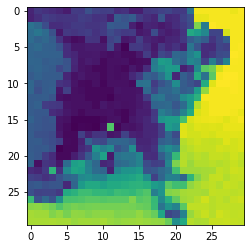

In [37]:
# printing a random image from the data
random_image_name = random.choice(dogs_cats.image)
random_image = cv2.imread(PATH + '/' + str(random_image_name))
random_image = cv2.resize(random_image, (IMAGE_SIZE, IMAGE_SIZE))
random_image = cv2.cvtColor(random_image, cv2.COLOR_RGB2GRAY)
plt.imshow(random_image)

In [38]:
pca_components = PCA(n_components=300)
X_transformed_train = pca_components.fit(X_train).transform(X_train)
X_transformed_test = pca_components.transform(X_test)
print("shape of 2 component PCA train data is:", X_transformed_train.shape)
print("shape of 2 component PCA test data is:", X_transformed_test.shape)

shape of 2 component PCA train data is: (20000, 300)
shape of 2 component PCA test data is: (5000, 300)


In [39]:
pca_components.explained_variance_ratio_

array([0.18865992, 0.10516177, 0.07248989, 0.05764494, 0.03013984,
       0.02689269, 0.02264804, 0.01905431, 0.01780114, 0.01732971,
       0.01387544, 0.01244606, 0.01155782, 0.01004053, 0.00848195,
       0.00780121, 0.00757052, 0.00695596, 0.00680993, 0.00634302,
       0.00590444, 0.00512697, 0.00502776, 0.0049769 , 0.00467277,
       0.00443281, 0.00440334, 0.00405462, 0.00388235, 0.00383631,
       0.00371041, 0.00354514, 0.00336964, 0.00329881, 0.00329076,
       0.0032265 , 0.00318021, 0.00292157, 0.00276913, 0.00274881,
       0.00262839, 0.00255642, 0.00247569, 0.0024084 , 0.0023479 ,
       0.0022388 , 0.00222687, 0.00220069, 0.00216261, 0.00205388,
       0.00203359, 0.00198093, 0.0019429 , 0.00187934, 0.00182747,
       0.00177369, 0.00174067, 0.0017191 , 0.00165434, 0.00162717,
       0.00160739, 0.00154717, 0.00151496, 0.00146708, 0.00143607,
       0.0014145 , 0.00140361, 0.00138957, 0.00135429, 0.00133092,
       0.00131319, 0.00129903, 0.00128946, 0.00127676, 0.00124

### Bagging Classifier:

In [40]:
bagging_clf = BaggingClassifier(
    DecisionTreeClassifier(),
    n_estimators=200,
    max_samples=100,
    bootstrap=True,
    n_jobs=-1)

# print accuracy
bagging_clf_auc = print_accuracy(bagging_clf, X_transformed_train, X_transformed_test, y_train, y_test)

              precision    recall  f1-score   support

           0       0.56      0.65      0.60      2498
           1       0.58      0.49      0.54      2502

    accuracy                           0.57      5000
   macro avg       0.57      0.57      0.57      5000
weighted avg       0.57      0.57      0.57      5000

accuracy of the model is: 57.12 %


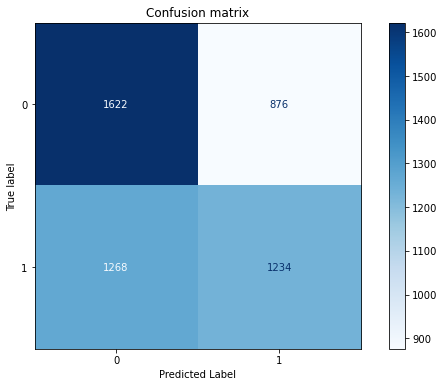

In [41]:
# plot the confusion matrix using the my_plot_confusion_matrix function
my_plot_confusion_matrix(bagging_clf, X_transformed_test, y_test)

### Pating Classifier:

In [42]:
pasting_clf = BaggingClassifier(
    DecisionTreeClassifier(),
    n_estimators=200,
    max_samples=100,
    bootstrap=False,
    n_jobs=-1)

# print accuracy
pasting_clf_auc = print_accuracy(pasting_clf, X_transformed_train, X_transformed_test, y_train, y_test)

              precision    recall  f1-score   support

           0       0.56      0.61      0.59      2498
           1       0.57      0.52      0.55      2502

    accuracy                           0.57      5000
   macro avg       0.57      0.57      0.57      5000
weighted avg       0.57      0.57      0.57      5000

accuracy of the model is: 56.64 %


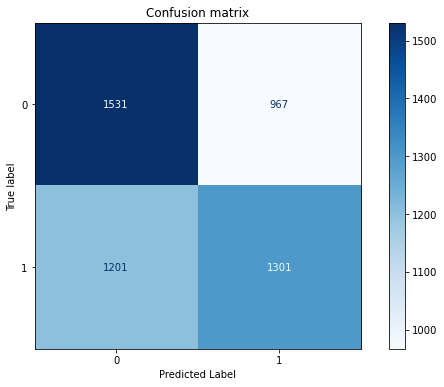

In [43]:
# plot the confusion matrix using the my_plot_confusion_matrix function
my_plot_confusion_matrix(pasting_clf, X_transformed_test, y_test)

### Random Forest Classifier:

In [44]:
rnd_clf = RandomForestClassifier(
    n_estimators=400,
    max_features=5,
    max_depth=16,
    n_jobs=-1)

# print accuracy
rnd_clf_auc = print_accuracy(rnd_clf, X_transformed_train, X_transformed_test, y_train, y_test)

              precision    recall  f1-score   support

           0       0.62      0.68      0.65      2498
           1       0.65      0.59      0.62      2502

    accuracy                           0.64      5000
   macro avg       0.64      0.64      0.64      5000
weighted avg       0.64      0.64      0.64      5000

accuracy of the model is: 63.62 %


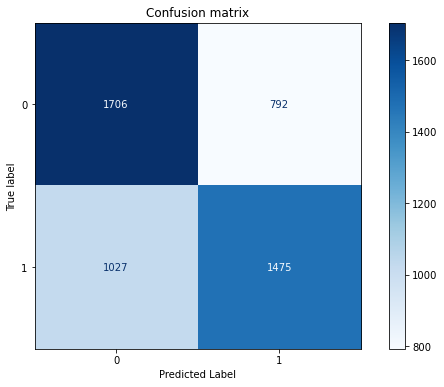

In [45]:
# plot the confusion matrix using the my_plot_confusion_matrix function
my_plot_confusion_matrix(rnd_clf, X_transformed_test, y_test)

### AdaBoost Classifier:

In [46]:
adaboost_clf = AdaBoostClassifier(
    DecisionTreeClassifier(max_depth=16),
    n_estimators=200,
    algorithm="SAMME.R",
    learning_rate=0.5)

# print accuracy
adaboost_clf_auc = print_accuracy(adaboost_clf, X_transformed_train, X_transformed_test, y_train, y_test)

              precision    recall  f1-score   support

           0       0.57      0.55      0.56      2498
           1       0.56      0.58      0.57      2502

    accuracy                           0.56      5000
   macro avg       0.56      0.56      0.56      5000
weighted avg       0.56      0.56      0.56      5000

accuracy of the model is: 56.46 %


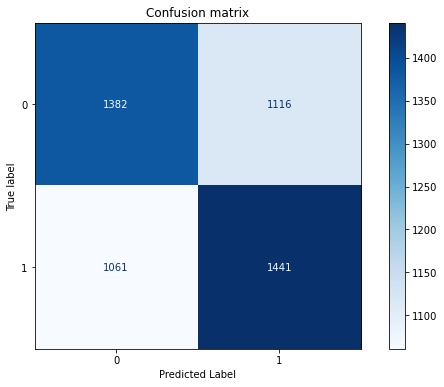

In [47]:
# plot the confusion matrix using the my_plot_confusion_matrix function
my_plot_confusion_matrix(adaboost_clf, X_transformed_test, y_test)

### Extreme Gradient Boostring Classifier(Binary):

In [48]:
bin_xgb_model = xgb.XGBClassifier(
    learning_rate=0.1,
    n_estimators=200,
    use_label_encoder=False,
    objective="binary:logistic",
    eval_metric="auc",
    verbosity=1,
    n_jobs=-1)

# print accuracy
bin_xgb_model_auc = print_accuracy(bin_xgb_model, X_transformed_train, X_transformed_test, y_train, y_test)

              precision    recall  f1-score   support

           0       0.66      0.67      0.66      2498
           1       0.66      0.65      0.66      2502

    accuracy                           0.66      5000
   macro avg       0.66      0.66      0.66      5000
weighted avg       0.66      0.66      0.66      5000

accuracy of the model is: 65.84 %


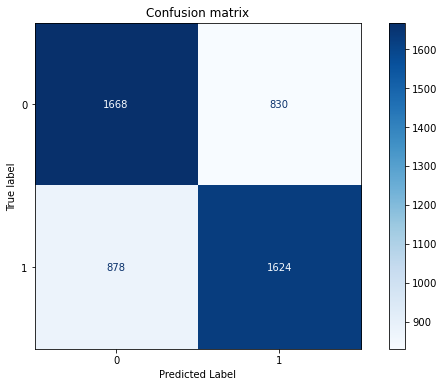

In [49]:
# plot the confusion matrix using the my_plot_confusion_matrix function
my_plot_confusion_matrix(bin_xgb_model, X_transformed_test, y_test)

### Grid Search with Random Forest Classifier

In [50]:
rnd_clf = RandomForestClassifier().fit(X_transformed_train, y_train)

param_values = {'n_estimators' : [50,100,200], 'max_features' : [5,10,20]}
gs_rnd_clf = GridSearchCV(rnd_clf, param_grid=param_values, cv=5, scoring='accuracy', n_jobs=-1)

gs_rnd_clf.fit(X_transformed_train, y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'max_features': [5, 10, 20],
                         'n_estimators': [50, 100, 200]},
             scoring='accuracy')

In [51]:
print(gs_rnd_clf.best_params_)
print('accuracy of the model is: {} %'.format("%.2f" % (gs_rnd_clf.best_score_ * 100)))
gs_rnd_clf_auc = gs_rnd_clf.best_score_

{'max_features': 20, 'n_estimators': 200}
accuracy of the model is: 63.00 %


### Grid Seach with Extreme Gradient Boostring Classifier:

In [52]:
mul_xgb_model= xgb.XGBClassifier(
    learning_rate=0.1,
    use_label_encoder=False,
    eval_metric="mlogloss",
    verbosity=1,
    n_jobs=-1)

param_values = {'n_estimators' : [50,100,200], 'max_features' : [5,10,20], 'max_depth' : [2,8,16]}
gs_mul_xgb_model = GridSearchCV(mul_xgb_model, param_grid=param_values, cv=5, scoring='accuracy', n_jobs=-1)

gs_mul_xgb_model.fit(X_transformed_train, y_train)

[22:20:01] WARNING: ..\src\learner.cc:541: 
Parameters: { max_features } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.




GridSearchCV(cv=5,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None,
                                     eval_metric='mlogloss', gamma=None,
                                     gpu_id=None, importance_type='gain',
                                     interaction_constraints=None,
                                     learning_rate=0.1, max_delta_step=None,
                                     max_depth=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     n_estimators=100, n_jobs=-1,
                                     num_parallel_tree=None, random_state=None,
                                     reg_alpha=None, reg_lambda=None,
                                     scale_pos_weight=None, subsample=No

In [53]:
print(gs_mul_xgb_model.best_params_)
print('accuracy of the model is: {} %'.format("%.2f" % (gs_mul_xgb_model.best_score_ * 100)))
gs_mul_xgb_model_auc = gs_mul_xgb_model.best_score_

{'max_depth': 16, 'max_features': 5, 'n_estimators': 200}
accuracy of the model is: 66.20 %


In [54]:
classifiers_accuracy = {
    'Bagging Classifier' : bagging_clf_auc,
    'Pasting Classifier' : pasting_clf_auc,
    'Random Forest Classifier': rnd_clf_auc,
    'AdaBoostring Classifier' : adaboost_clf_auc,
    'Extreme Gradient Boostring Classifier(Binary)' : bin_xgb_model_auc,
    'Grid Search with Random Forest Classifier' : gs_rnd_clf_auc,
    'Grid Seach with Extreme Gradient Boostring Classifier(Multi)' : gs_mul_xgb_model_auc
}
components_accuracy.append(classifiers_accuracy)

# <i>Conclusions of best model in 30^2 pixels (greysacle) and PCA of 300 Components</i>

In [55]:
max_accuracy_classifier = max(classifiers_accuracy, key=classifiers_accuracy.get)
print("\nThe classifier with the maximum accuracy in 30^2 pixels images (greysacle) and 185-PCA Components is: {}, with the accuracy of: {} %".format(max_accuracy_classifier, "%.2f" % (100 * classifiers_accuracy[max_accuracy_classifier])))


The classifier with the maximum accuracy in 30^2 pixels images (greysacle) and 185-PCA Components is: Grid Seach with Extreme Gradient Boostring Classifier(Multi), with the accuracy of: 66.20 %


# 30^2 Pixels with no grey scale and PCA of 185 Components:

In [56]:
# images size
IMAGE_SIZE = 30

In [57]:
image_data  = []
image_label = []

for i in range(len(dogs_cats)):
    IMAGE_PATH = PATH + '/' + dogs_cats["image"][i]
    image = cv2.imread(IMAGE_PATH)
    image = cv2.resize(image, (IMAGE_SIZE, IMAGE_SIZE))
    
    norm_image = image / 255.0
    
    image_data.append(norm_image)
    image_label.append(dogs_cats["label"][i])

X = np.array(image_data)
y = np.array(image_label)

X = np.reshape(X, (25000,2700))

In [58]:
X.shape

(25000, 2700)

In [59]:
y.shape

(25000,)

In [60]:
# split data to 20000 train samples and 5000 to test samples
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20)

In [61]:
# train shape is 20000 on 30^2 pixels
X_train.shape

(20000, 2700)

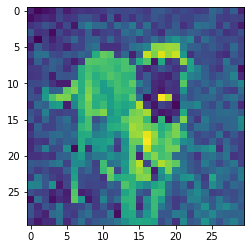

In [62]:
# printing a random image from the data
random_image_name = random.choice(dogs_cats.image)
random_image = cv2.imread(PATH + '/' + str(random_image_name))
random_image = cv2.resize(random_image, (IMAGE_SIZE, IMAGE_SIZE))
random_image = cv2.cvtColor(random_image, cv2.COLOR_RGB2GRAY)
plt.imshow(random_image)

In [63]:
pca_components = PCA(n_components=185)
X_transformed_train = pca_components.fit(X_train).transform(X_train)
X_transformed_test = pca_components.transform(X_test)
print("shape of 2 component PCA train data is:", X_transformed_train.shape)
print("shape of 2 component PCA test data is:", X_transformed_test.shape)

shape of 2 component PCA train data is: (20000, 185)
shape of 2 component PCA test data is: (5000, 185)


In [64]:
pca_components.explained_variance_ratio_

array([0.19070668, 0.10450125, 0.07164825, 0.05780569, 0.03003232,
       0.026809  , 0.02257071, 0.01936534, 0.01770016, 0.01743514,
       0.01378501, 0.01242791, 0.01165114, 0.00992576, 0.00842145,
       0.0078533 , 0.00756534, 0.00695641, 0.00686305, 0.00629559,
       0.00583236, 0.00506328, 0.00500908, 0.00495877, 0.004658  ,
       0.00443234, 0.00441125, 0.00403803, 0.00384531, 0.0038163 ,
       0.00367536, 0.00350608, 0.00337811, 0.00332771, 0.00329966,
       0.00320346, 0.00317865, 0.00292701, 0.00280497, 0.00269491,
       0.00265597, 0.00257455, 0.00253011, 0.00237698, 0.00233607,
       0.00225111, 0.00222955, 0.00219929, 0.00215256, 0.00202968,
       0.00201737, 0.00197864, 0.00193493, 0.00186203, 0.00181593,
       0.00178396, 0.00174488, 0.00170778, 0.00166021, 0.00162152,
       0.00157877, 0.00153934, 0.00150267, 0.00146703, 0.00144428,
       0.00142237, 0.00140876, 0.00139014, 0.00134223, 0.00133023,
       0.00131536, 0.00130063, 0.00128827, 0.00127061, 0.00123

### Bagging Classifier:

In [65]:
bagging_clf = BaggingClassifier(
    DecisionTreeClassifier(),
    n_estimators=200,
    max_samples=100,
    bootstrap=True,
    n_jobs=-1)

# print accuracy
bagging_clf_auc = print_accuracy(bagging_clf, X_transformed_train, X_transformed_test, y_train, y_test)

              precision    recall  f1-score   support

           0       0.58      0.64      0.60      2507
           1       0.59      0.53      0.56      2493

    accuracy                           0.58      5000
   macro avg       0.58      0.58      0.58      5000
weighted avg       0.58      0.58      0.58      5000

accuracy of the model is: 58.32 %


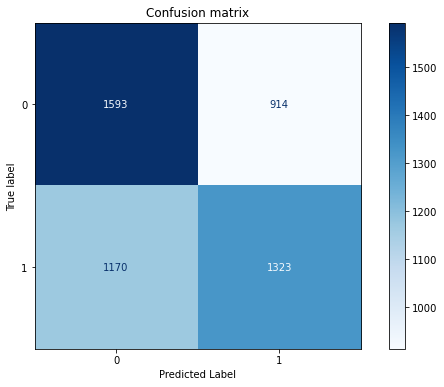

In [66]:
# plot the confusion matrix using the my_plot_confusion_matrix function
my_plot_confusion_matrix(bagging_clf, X_transformed_test, y_test)

### Pating Classifier:

In [67]:
pasting_clf = BaggingClassifier(
    DecisionTreeClassifier(),
    n_estimators=200,
    max_samples=100,
    bootstrap=False,
    n_jobs=-1)

# print accuracy
pasting_clf_auc = print_accuracy(pasting_clf, X_transformed_train, X_transformed_test, y_train, y_test)

              precision    recall  f1-score   support

           0       0.57      0.57      0.57      2507
           1       0.57      0.57      0.57      2493

    accuracy                           0.57      5000
   macro avg       0.57      0.57      0.57      5000
weighted avg       0.57      0.57      0.57      5000

accuracy of the model is: 57.00 %


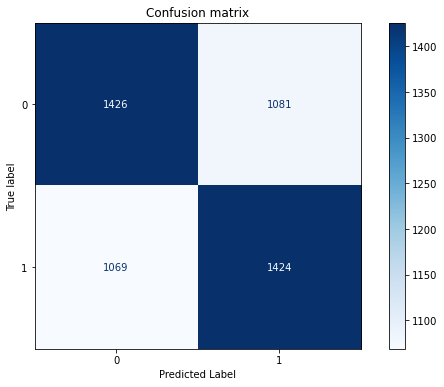

In [68]:
# plot the confusion matrix using the my_plot_confusion_matrix function
my_plot_confusion_matrix(pasting_clf, X_transformed_test, y_test)

### Random Forest Classifier:

In [69]:
rnd_clf = RandomForestClassifier(
    n_estimators=400,
    max_features=5,
    max_depth=16,
    n_jobs=-1)

# print accuracy
rnd_clf_auc = print_accuracy(rnd_clf, X_transformed_train, X_transformed_test, y_train, y_test)

              precision    recall  f1-score   support

           0       0.64      0.67      0.65      2507
           1       0.65      0.62      0.63      2493

    accuracy                           0.64      5000
   macro avg       0.65      0.64      0.64      5000
weighted avg       0.65      0.64      0.64      5000

accuracy of the model is: 64.48 %


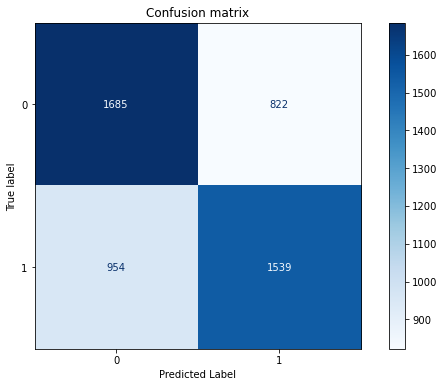

In [70]:
# plot the confusion matrix using the my_plot_confusion_matrix function
my_plot_confusion_matrix(rnd_clf, X_transformed_test, y_test)

### AdaBoost Classifier:

In [71]:
adaboost_clf = AdaBoostClassifier(
    DecisionTreeClassifier(max_depth=16),
    n_estimators=200,
    algorithm="SAMME.R",
    learning_rate=0.5)

# print accuracy
adaboost_clf_auc = print_accuracy(adaboost_clf, X_transformed_train, X_transformed_test, y_train, y_test)

              precision    recall  f1-score   support

           0       0.57      0.61      0.59      2507
           1       0.58      0.54      0.56      2493

    accuracy                           0.57      5000
   macro avg       0.58      0.57      0.57      5000
weighted avg       0.58      0.57      0.57      5000

accuracy of the model is: 57.50 %


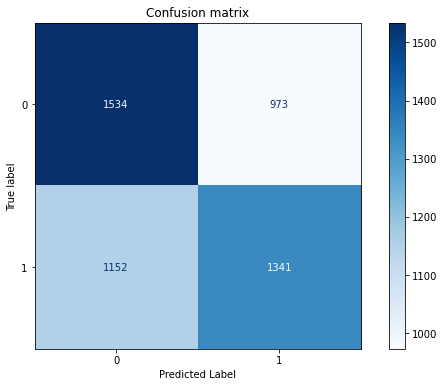

In [72]:
# plot the confusion matrix using the my_plot_confusion_matrix function
my_plot_confusion_matrix(adaboost_clf, X_transformed_test, y_test)

### Extreme Gradient Boostring Classifier(Binary):

In [73]:
bin_xgb_model = xgb.XGBClassifier(
    learning_rate=0.1,
    n_estimators=200,
    use_label_encoder=False,
    objective="binary:logistic",
    eval_metric="auc",
    verbosity=1,
    n_jobs=-1)

# print accuracy
bin_xgb_model_auc = print_accuracy(bin_xgb_model, X_transformed_train, X_transformed_test, y_train, y_test)

              precision    recall  f1-score   support

           0       0.65      0.68      0.66      2507
           1       0.66      0.63      0.65      2493

    accuracy                           0.65      5000
   macro avg       0.65      0.65      0.65      5000
weighted avg       0.65      0.65      0.65      5000

accuracy of the model is: 65.40 %


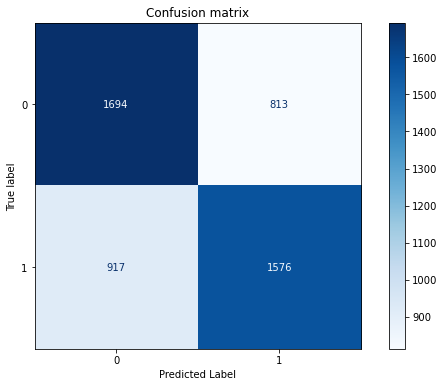

In [74]:
# plot the confusion matrix using the my_plot_confusion_matrix function
my_plot_confusion_matrix(bin_xgb_model, X_transformed_test, y_test)

### Grid Search with Random Forest Classifier

In [75]:
rnd_clf = RandomForestClassifier().fit(X_transformed_train, y_train)

param_values = {'n_estimators' : [50,100,200], 'max_features' : [5,10,20]}
gs_rnd_clf = GridSearchCV(rnd_clf, param_grid=param_values, cv=5, scoring='accuracy', n_jobs=-1)

gs_rnd_clf.fit(X_transformed_train, y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'max_features': [5, 10, 20],
                         'n_estimators': [50, 100, 200]},
             scoring='accuracy')

In [76]:
print(gs_rnd_clf.best_params_)
print('accuracy of the model is: {} %'.format("%.2f" % (gs_rnd_clf.best_score_ * 100)))
gs_rnd_clf_auc = gs_rnd_clf.best_score_

{'max_features': 20, 'n_estimators': 200}
accuracy of the model is: 63.61 %


### Grid Seach with Extreme Gradient Boostring Classifier:

In [77]:
mul_xgb_model= xgb.XGBClassifier(
    learning_rate=0.1,
    use_label_encoder=False,
    eval_metric="mlogloss",
    verbosity=1,
    n_jobs=-1)

param_values = {'n_estimators' : [50,100,200], 'max_features' : [5,10,20], 'max_depth' : [2,8,16]}
gs_mul_xgb_model = GridSearchCV(mul_xgb_model, param_grid=param_values, cv=5, scoring='accuracy', n_jobs=-1)

gs_mul_xgb_model.fit(X_transformed_train, y_train)

[23:22:00] WARNING: ..\src\learner.cc:541: 
Parameters: { max_features } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.




GridSearchCV(cv=5,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None,
                                     eval_metric='mlogloss', gamma=None,
                                     gpu_id=None, importance_type='gain',
                                     interaction_constraints=None,
                                     learning_rate=0.1, max_delta_step=None,
                                     max_depth=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     n_estimators=100, n_jobs=-1,
                                     num_parallel_tree=None, random_state=None,
                                     reg_alpha=None, reg_lambda=None,
                                     scale_pos_weight=None, subsample=No

In [78]:
print(gs_mul_xgb_model.best_params_)
print('accuracy of the model is: {} %'.format("%.2f" % (gs_mul_xgb_model.best_score_ * 100)))
gs_mul_xgb_model_auc = gs_mul_xgb_model.best_score_

{'max_depth': 16, 'max_features': 5, 'n_estimators': 200}
accuracy of the model is: 65.98 %


In [79]:
classifiers_accuracy = {
    'Bagging Classifier' : bagging_clf_auc,
    'Pasting Classifier' : pasting_clf_auc,
    'Random Forest Classifier': rnd_clf_auc,
    'AdaBoostring Classifier' : adaboost_clf_auc,
    'Extreme Gradient Boostring Classifier(Binary)' : bin_xgb_model_auc,
    'Grid Search with Random Forest Classifier' : gs_rnd_clf_auc,
    'Grid Seach with Extreme Gradient Boostring Classifier(Multi)' : gs_mul_xgb_model_auc
}
components_accuracy.append(classifiers_accuracy)

# <i>Conclusions of best model in 30^2 pixels (greysacle) and PCA of 185 Components</i>

In [80]:
max_accuracy_classifier = max(classifiers_accuracy, key=classifiers_accuracy.get)
print("\nThe classifier with the maximum accuracy in 30^2 pixels images (greysacle) and 300-PCA Components is: {}, with the accuracy of: {} %".format(max_accuracy_classifier, "%.2f" % (100 * classifiers_accuracy[max_accuracy_classifier])))


The classifier with the maximum accuracy in 30^2 pixels images (greysacle) and 300-PCA Components is: Grid Seach with Extreme Gradient Boostring Classifier(Multi), with the accuracy of: 65.98 %


# Main Conclusions

In [81]:
i = 0
for classifiers_accuracy in components_accuracy:
    print("\n\n")
    if i == 0:
        print('335-PCA Components and 100^2 pixels images with greyscale:')
    elif i == 1:
        print('300-PCA Components and 30^2 pixels images with no greyscale:')
    else:
        print('185-PCA Components and 30^2 pixels images with no greyscale:')
    i += 1
    for cls in classifiers_accuracy:
        print(cls , ': ', "%.2f" % (100 * classifiers_accuracy[cls]), '%')
    max_accuracy_classifier = max(classifiers_accuracy, key=classifiers_accuracy.get)
    print("\nThe classifier with the maximum accuracy is: {}, with the accuracy of: {} %".format(max_accuracy_classifier, "%.2f" % (100 * classifiers_accuracy[max_accuracy_classifier])))




335-PCA Components and 100^2 pixels images with greyscale:
Bagging Classifier :  55.28 %
Pasting Classifier :  54.52 %
Random Forest Classifier :  60.80 %
AdaBoostring Classifier :  56.20 %
Extreme Gradient Boostring Classifier(Binary) :  64.36 %
Grid Search with Random Forest Classifier :  61.75 %
Grid Seach with Extreme Gradient Boostring Classifier(Multi) :  64.04 %

The classifier with the maximum accuracy is: Extreme Gradient Boostring Classifier(Binary), with the accuracy of: 64.36 %



300-PCA Components and 30^2 pixels images with no greyscale:
Bagging Classifier :  57.12 %
Pasting Classifier :  56.64 %
Random Forest Classifier :  63.62 %
AdaBoostring Classifier :  56.46 %
Extreme Gradient Boostring Classifier(Binary) :  65.84 %
Grid Search with Random Forest Classifier :  63.00 %
Grid Seach with Extreme Gradient Boostring Classifier(Multi) :  66.20 %

The classifier with the maximum accuracy is: Grid Seach with Extreme Gradient Boostring Classifier(Multi), with the accuracy